<a href="https://colab.research.google.com/github/Msanjayds/Keras/blob/master/Classification_Model_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required Libraries

In [0]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Extract the data

In [255]:
file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

data = pd.read_csv(file,names=['pregnancies','glucose','diastolic','triceps','insulin',
                                'bmi','dpf','age','diabetes'])
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Seperate the input features and the target variable

In [0]:
x = data.drop(columns=['diabetes'])
y = data['diabetes']

Split the train and test/validation set

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=0)


In [231]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((691, 8), (691,), (77, 8), (77,))

Define the Model - 3 layers (2 hidden layers with 100 nodes each and 1 output layer with a single)

In [0]:
#defifne a sequentail Model
model = Sequential()

#Hiddrn Layer 1
model.add(Dense(100,activation='relu',input_dim=8,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer 2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))

Compile the Model

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Check the Model summary

In [247]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_44 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_45 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


Train the Model

In [0]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

In [263]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.7303270627703577
Validation Accuracy :  0.7645974032391202


Plot the model accuracy over epochs

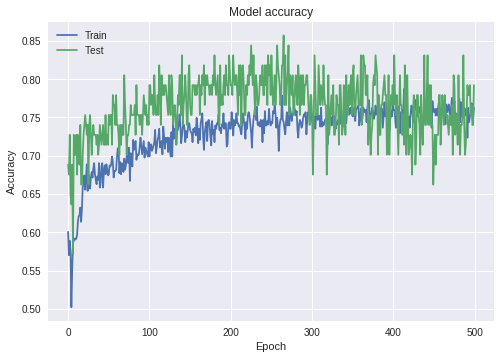

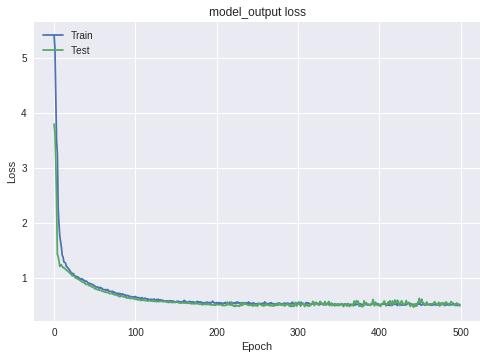

In [264]:

# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Do a Prediction and check the precision

In [0]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')


In [257]:

confusion_matrix(y_test,y_pred1)

array([[47,  4],
       [ 8, 18]])

In [266]:
precision_score(y_test,y_pred1)

0.8571428571428571

Save the Model

In [0]:
model.save("Calssifier.h5")

In [243]:
!ls

Calssifier.h5  raw.githubusercontent.com  sample_data
